In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('AmazonReview.csv')
df.head()

Review  Sentiment
0  Fast shipping but this product is very cheaply...          1
1  This case takes so long to ship and it's not e...          1
2  Good for not droids. Not good for iPhones. You...          1
3  The cable was not compatible between my macboo...          1
4  The case is nice but did not have a glow light...          1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.count()

Review       24999
Sentiment    25000
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.nunique()

Review       24744
Sentiment        5
dtype: int64

<AxesSubplot:>

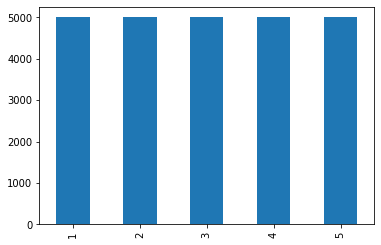

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')

In [ ]:
def remove_nan(text):
    if isinstance(text,str):
        return text
    else:
        return ""

df['Review'] = df['Review'].apply(remove_nan)

In [ ]:
#remove punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review']

0        Fast shipping but this product is very cheaply...
1        This case takes so long to ship and its not ev...
2        Good for not droids Not good for iPhones You c...
3        The cable was not compatible between my macboo...
4        The case is nice but did not have a glow light...
                               ...                        
24995    These cables lightning are far superior to mos...
24996    This unit performs exactly as advertised  I us...
24997    I had the key cut at a local hardware store cu...
24998    I love my case I ordered from amazon It wasnt ...
24999    Awsome I loved this little speaker It has grea...
Name: Review, Length: 24999, dtype: object

In [ ]:
df['Review'].str.lower()

0        fast shipping but this product is very cheaply...
1        this case takes so long to ship and its not ev...
2        good for not droids not good for iphones you c...
3        the cable was not compatible between my macboo...
4        the case is nice but did not have a glow light...
                               ...                        
24995    these cables lightning are far superior to mos...
24996    this unit performs exactly as advertised  i us...
24997    i had the key cut at a local hardware store cu...
24998    i love my case i ordered from amazon it wasnt ...
24999    awsome i loved this little speaker it has grea...
Name: Review, Length: 24999, dtype: object

In [ ]:
#STEMMING
st = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Review']

0        fast ship but thi product is veri cheapli made...
1        thi case take so long to ship and it not even ...
2        good for not droid not good for iphon you cann...
3        the cabl wa not compat between my macbook and ...
4        the case is nice but did not have a glow light...
                               ...                        
24995    these cabl lightn are far superior to most all...
24996    thi unit perform exactli as advertis i use it ...
24997    i had the key cut at a local hardwar store cut...
24998    i love my case i order from amazon it wasnt th...
24999    awsom i love thi littl speaker it ha great sou...
Name: Review, Length: 24999, dtype: object

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [138]:
df["Positive"] = [sia.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sia.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sia.polarity_scores(i)["neu"] for i in df["Review"]]
df.head(3)

Review  Sentiment  Positive  \
0  fast ship but thi product is veri cheapli made...          1     0.224   
1  thi case take so long to ship and it not even ...          1     0.000   
2  good for not droid not good for iphon you cann...          1     0.177   

   Negative  Neutral  
0     0.000    0.776  
1     0.106    0.894  
2     0.000    0.823

In [139]:
X = sum(df["Positive"])
Y = sum(df["Negative"])
Z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ") 
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(X, Y, Z)


Neutral 🙂 


In [140]:
print("Positive: ", X)
print("Negative: ", Y)
print("Neutral: ", Z)

Positive:  3427.774000000017
Negative:  1404.6879999999992
Neutral:  20157.648999999925


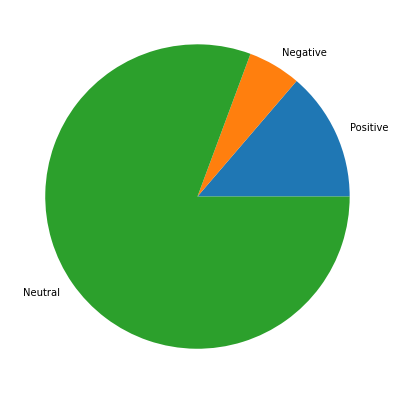

In [141]:
Scores=['Positive','Negative','Neutral']
data=[X,Y,Z]
fig = plt.figure(figsize =(10, 7))
plt.pie(data,labels=Scores)
plt.show()

In [142]:
stp_words = stopwords.words('english')
def clean_review(review):
  Review=" ".join(word for word in review.split() if word not in stp_words)
  return Review
 
df['Review']=df['Review'].apply(clean_review)

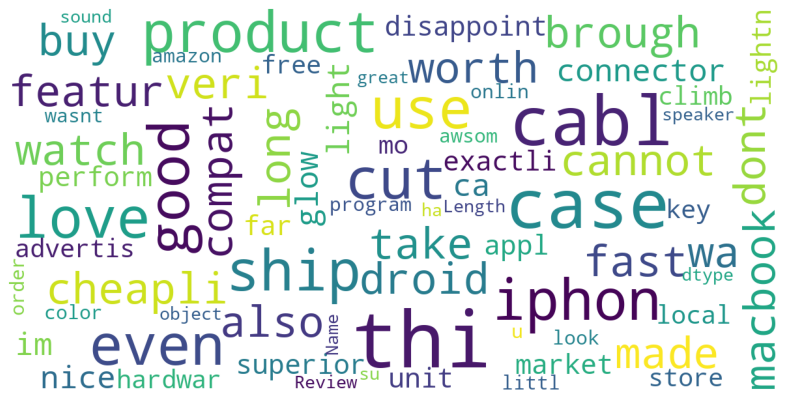

In [143]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stp_words,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['Review']) 

In [144]:
def get_sentiment(c1,c2,c3):
    if c1 > c2 and c1 > c3:
        return 'positive'
    elif c2> c1 and c2 > c3:
        return 'negative'
    else:
        return 'neutral'
df['sentiment']=df[['Positive','Negative','Neutral']].apply(lambda x: get_sentiment(x.Positive,x.Negative,x.Neutral),axis=1)

<AxesSubplot:ylabel='sentiment'>

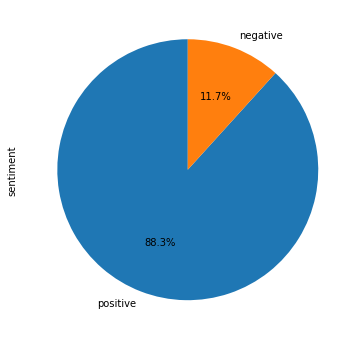

In [145]:
cat_count_df = df.groupby(['sentiment'], as_index=False)['Review'].count()
df[df.sentiment != 'neutral'].sentiment.value_counts().plot(kind='pie', autopct='%.1f%%', figsize=(6,6), startangle=90)

In [146]:
df.tail(5)

Review  Sentiment  Positive  \
24995  cabl lightn far superior cabl market even appl...          5     0.214   
24996  thi unit perform exactli advertis use climb mo...          5     0.099   
24997  key cut local hardwar store cut free program u...          5     0.193   
24998  love case order amazon wasnt color look onlin ...          5     0.245   
24999  awsom love thi littl speaker ha great sound su...          5     0.573   

       Negative  Neutral sentiment  
24995     0.000    0.786   neutral  
24996     0.037    0.864   neutral  
24997     0.093    0.714   neutral  
24998     0.000    0.755   neutral  
24999     0.000    0.427  positive

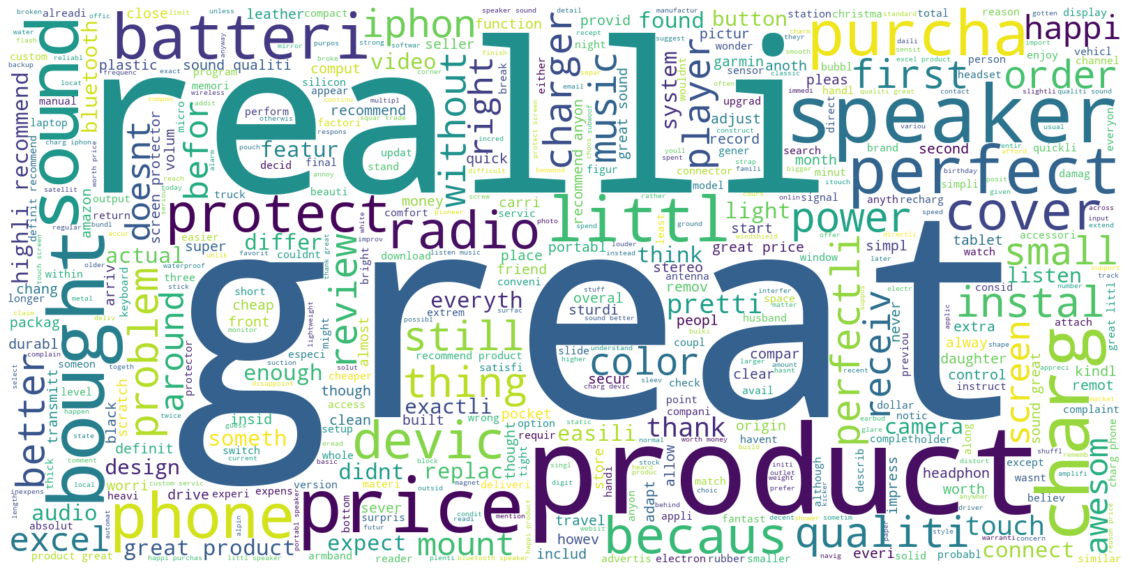

In [147]:
plt.figure(figsize = (20,20))
Wc3 = WordCloud(max_words = 500 , width = 1600 , height = 800, min_word_length=5,background_color='white').generate(" ".join(df[df.Sentiment == 5].Review))

plt.axis("off")
plt.imshow(Wc3, interpolation = 'bilinear')

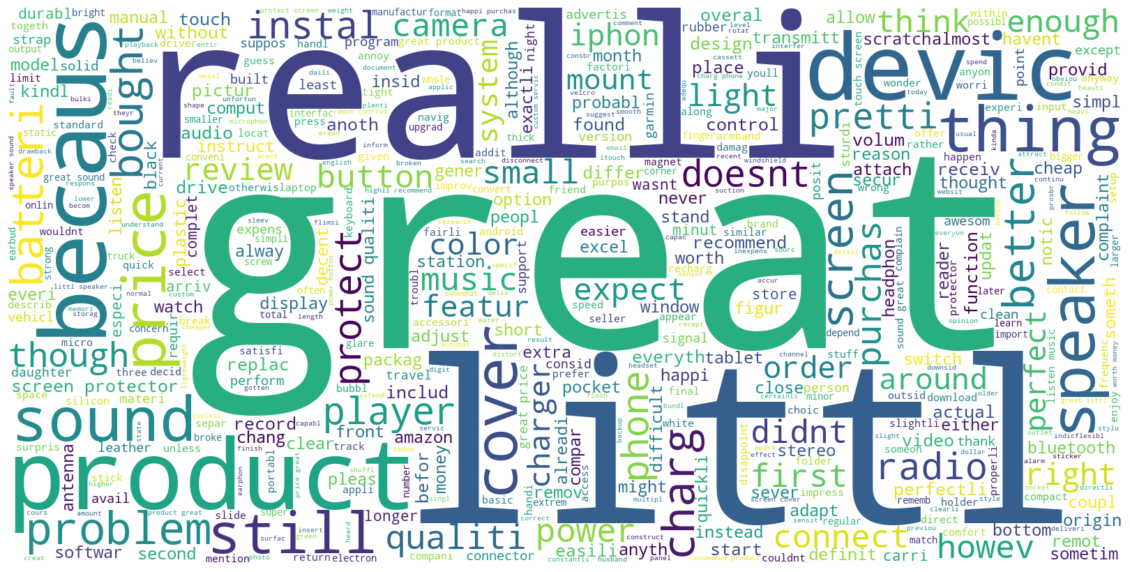

In [148]:
plt.figure(figsize = (20,20))
Wc4 = WordCloud(max_words = 500 , width = 1600 , height = 800, min_word_length=5,background_color='white').generate(" ".join(df[df.Sentiment == 4].Review))

plt.axis("off")
plt.imshow(Wc4, interpolation = 'bilinear')

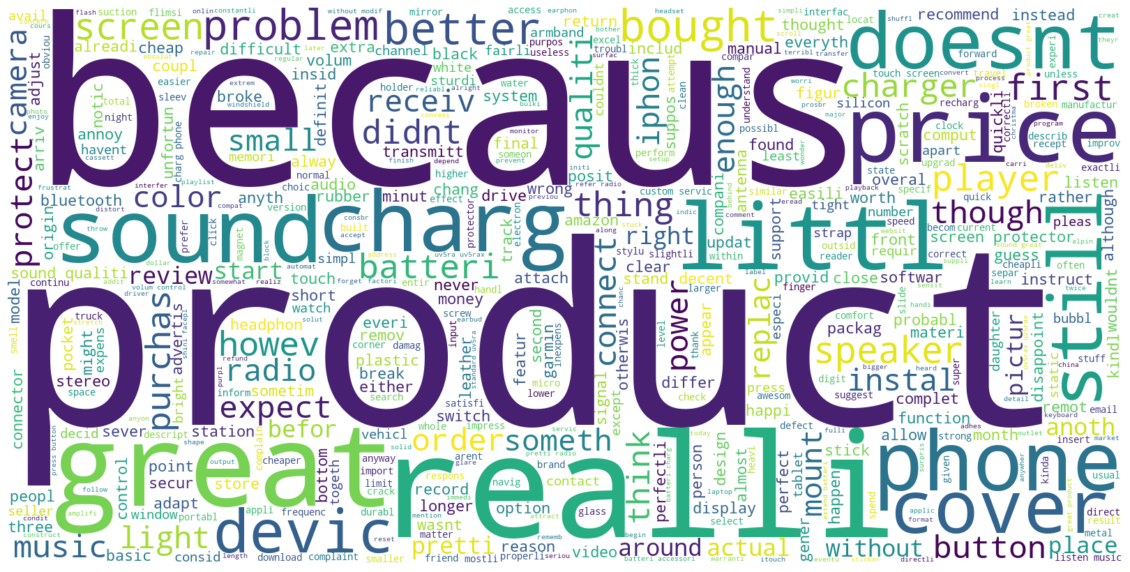

In [149]:
plt.figure(figsize = (20,20))
Wc5 = WordCloud(max_words = 500 , width = 1600 , height = 800, min_word_length=5,background_color='white').generate(" ".join(df[df.Sentiment == 3].Review))

plt.axis("off")
plt.imshow(Wc5, interpolation = 'bilinear')

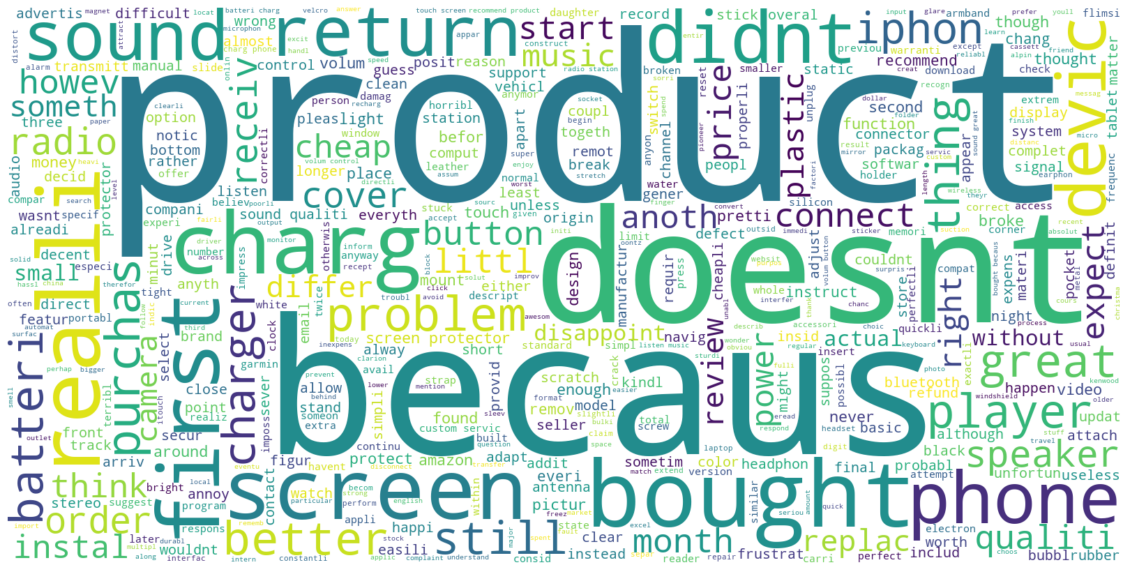

In [150]:
plt.figure(figsize = (20,20))
Wc6 = WordCloud(max_words = 500 , width = 1600 , height = 800, min_word_length=5,background_color='white').generate(" ".join(df[df.Sentiment == 2].Review))

plt.axis("off")
plt.imshow(Wc6, interpolation = 'bilinear')

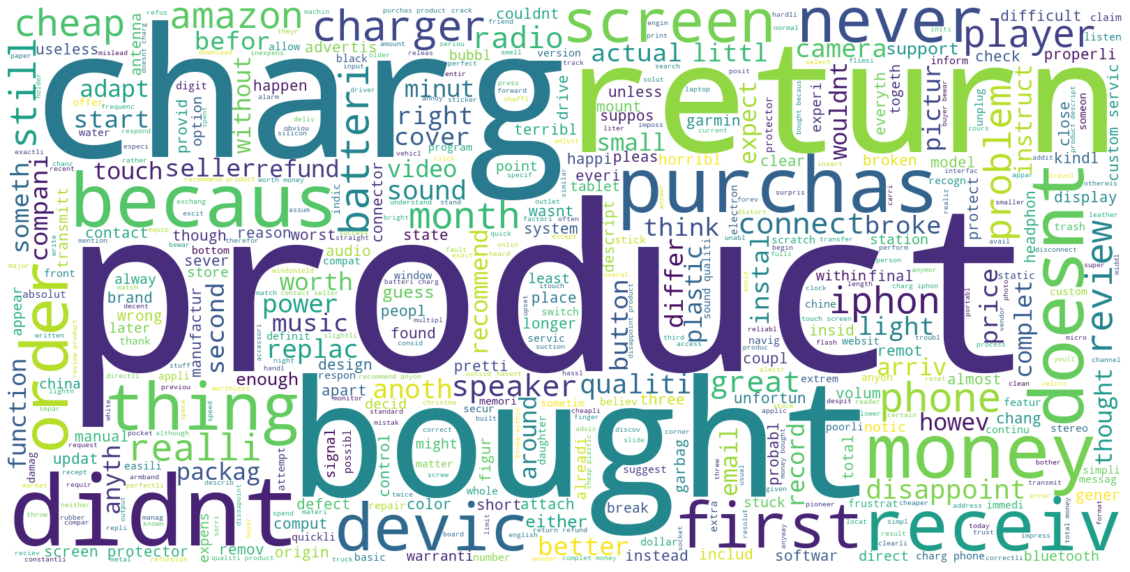

In [151]:
plt.figure(figsize = (20,20))
Wc7 = WordCloud(max_words = 500 , width = 1600 , height = 800, min_word_length=5,background_color='white').generate(" ".join(df[df.Sentiment == 1].Review))

plt.axis("off")
plt.imshow(Wc7, interpolation = 'bilinear')

In [152]:
subjectivity=[]
for i in df['Review'].values:
    try:
        analysis=TextBlob(i)
        subjectivity.append(analysis.sentiment.subjectivity)
    except:
        subjectivity.append(0)    
df['subjectivity']=subjectivity

In [153]:
df.head(-30)

Review  Sentiment  Positive  \
0      fast ship thi product veri cheapli made brough...          1     0.224   
1            thi case take long ship even worth dont buy          1     0.000   
2      good droid good iphon cannot use featur watch ...          1     0.177   
3      cabl wa compat macbook iphon also connector ca...          1     0.000   
4      case nice glow light im disappoint product did...          1     0.085   
...                                                  ...        ...       ...   
24965  work veri good phone problem qualiti signal go...          5     0.226   
24966  thi nice case doe job love littl pocket cloth ...          5     0.176   
24967                sound great price doe job veri well          5     0.360   
24968                box fit back seat great sound great          5     0.641   
24969  soft smooth veri pretti tattoo stick well nook...          5     0.087   

       Negative  Neutral sentiment  subjectivity  
0         0.000    0.776   neutral      0.600000  
1         0.106    0.894   neutral      0.250000  
2         0.000    0.823   neutral      0.600000  
3         0.000    1.000   neutral      0.000000  
4         0.158    0.757   neutral      0.850000  
...         ...      ...       ...           ...  
24965     0.191    0.584   neutral      0.600000  
24966     0.057    0.767   neutral      0.480952  
24967     0.000    0.640   neutral      0.575000  
24968     0.000    0.359  positive      0.460000  
24969     0.000    0.913   neutral      0.425000  

[24969 rows x 7 columns]